In [1]:
from gurobipy import *
from math import * 

In [2]:
"""

Poikonen, S., & Golden, B. (2020). 
The mothership and drone routing problem. 
INFORMS Journal on Computing, 32(2), 249-262.

https://drive.google.com/file/d/1C_4_F6HzwCA3upkeWnZ0CWkMoHHefzy5/view

"""


n=4

In [3]:
s=((10,10),(10,90),(90,15),(90,10),(50,0),(10,10));

orig=(10,10)
dest=(10,10)
R=20
alpha=2

In [4]:
# Create a new model
m = Model("Poikonen_2019")

Academic license - for non-commercial use only


In [5]:
# Create variables

cTime = {};
sTime = {};

lPoint_x= {};
lPoint_y= {};

rPoint_x= {};
rPoint_y= {};

Qx = {};
Qy = {};

w = {};


outFlightDist = {};
inFlightDist = {};

#for SOCP
Cx= {};
Cy= {};
C= {};


In [6]:
for i in range(0, n+1):
    
    
    outFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='outFlightDist[%s]'%i);
    inFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='inFlightDist[%s]'%i);
    

    

for i in range(0, n+2):
    lPoint_x[i] = m.addVar(vtype = 'C',name='lPoint_x[%s]'%i);
    lPoint_y[i] = m.addVar(vtype = 'C',name='lPoint_y[%s]'%i);
    
    rPoint_x[i] = m.addVar(vtype = 'C',name='rPoint_x[%s]'%i);
    rPoint_y[i] = m.addVar(vtype = 'C',name='rPoint_y[%s]'%i);
    
    Qx[i] = m.addVar(vtype = 'C',name='Qx[%s]'%i);
    Qy[i] = m.addVar(vtype = 'C',name='Qy[%s]'%i);
    
    cTime[i] = m.addVar(lb=0.0,vtype = 'C',name='cTime[%s]'%i);
    
    sTime[i] = m.addVar(lb=0.0,vtype = 'C',name='sTime[%s]'%i);
    
    
    for j in range(0, n+2):
        w[i,j] = m.addVar(vtype = 'B',name='w[%s,%s]'%(i,j));
    

m.update()

In [7]:

# Add constraint: 
ctr=0;


#A8
m.addConstr( lPoint_x[0]==orig[0]);
m.addConstr( lPoint_y[0]==orig[1] ); 
#A9
m.addConstr( rPoint_x[0]==orig[0] ); 
m.addConstr( rPoint_y[0]==orig[1]); 
#A10
m.addConstr( lPoint_x[n+1]==dest[0]); 
m.addConstr( lPoint_y[n+1]==dest[1] ); 
#A11
m.addConstr( rPoint_x[n+1]==dest[0]); 
m.addConstr( rPoint_y[n+1]==dest[1]); 

for k in range(0, n+1):
    #A2
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A2');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A2');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A2');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k+1] - rPoint_x[k], 'A2x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k+1] - rPoint_y[k], 'A2y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A2.2');
    m.addConstr( C[ctr]-cTime[k]   == 0, 'A2.3');
    
    #A3
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k] - rPoint_x[k], 'A3x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k] - rPoint_y[k], 'A3y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2');
    m.addConstr( C[ctr]-sTime[k]   == 0, 'A3.3');
    
    
    #A4
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A4');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A4');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A4');
    
    
    m.addConstr( Cx[ctr]  == Qx[k] - lPoint_x[k], 'A4x.1'); 
    m.addConstr( Cy[ctr]  == Qy[k] - lPoint_y[k], 'A4y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A4.2');
    m.addConstr( C[ctr]-outFlightDist[k]   == 0, 'A4.3'); 
    
    #A5
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A5');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A5');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A5');
    
    
    m.addConstr( Cx[ctr]  == Qx[k]- rPoint_x[k], 'A5x.1'); 
    m.addConstr( Cy[ctr]  == Qy[k] - rPoint_y[k], 'A5y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A5.2');
    m.addConstr( C[ctr]-inFlightDist[k]   == 0, 'A5.3'); 
    
    
    #A6
    m.addConstr( (outFlightDist[k] + inFlightDist[k])/alpha   <= sTime[k], 'A6'); 
    
    #A7
    m.addConstr( sTime[k]   <= R, 'A7'); 
    
    
    
    ######
for i in range(0, n+2):

    
        m.addConstr( Qx[i]  == quicksum(w[i,j]*s[j][0] for j in range(0,n+2)), 'C.8x.[%s]'%i); 
        m.addConstr( Qy[i]  == quicksum(w[i,j]*s[j][1] for j in range(0,n+2)), 'C.8y.[%s]'%i); 
    
    
        m.addConstr( quicksum(w[i,j] for j in range(0,n+2))  == 1, 'C.9.[%s]'%i); 
    
for j in range(0, n+2):
    
     m.addConstr( quicksum(w[i,j] for i in range(0,n+2))  == 1, 'C.10.[%s]'%j);
    
    

In [8]:
# Set objective:


obj = quicksum((cTime[k]+sTime[k]) for k in range(0,n+2))

m.setObjective(obj,GRB.MINIMIZE)

In [9]:
m.optimize()

Optimize a model with 102 rows, 154 columns and 338 nonzeros
Model has 20 quadratic constraints
Variable types: 118 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [5e-01, 9e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 54 rows and 62 columns
Presolve time: 0.01s
Presolved: 48 rows, 92 columns, 188 nonzeros
Variable types: 63 continuous, 29 integer (25 binary)

Root relaxation: objective 0.000000e+00, 22 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                     233.1372046    0.00000   100%     -    0s
*    0     0               0     233.1372046    0.00000   100%     -    0s
     0     0    0.00000    0    6  233.13720    0.00000   100%     -    0s
     0     0   51.59074    0   17  233.13720   5

<function matplotlib.pyplot.show(*args, **kw)>

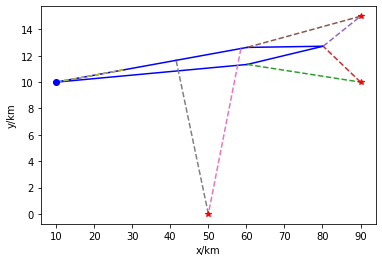

In [21]:
import matplotlib.pyplot as plt
plt.xlabel("x/km")
plt.ylabel("y/km")

#plt.plot([lPoint_x[1].X, orig[0]],[lPoint_y[1].X,  orig[1]], color= 'b')
#plt.plot([rPoint_x[n].X, dest[0]],[rPoint_y[n].X,  dest[1]], color= 'b')

for i in range(0,n+1):
    plt.plot([lPoint_x[i].X, rPoint_x[i].X],[lPoint_y[i].X,  rPoint_y[i].X], color= 'b')
    #if i<n:
    plt.plot([lPoint_x[i+1].X, rPoint_x[i].X],[lPoint_y[i+1].X,  rPoint_y[i].X], color= 'b')
    plt.plot([lPoint_x[i].X, Qx[i].X],[lPoint_y[i].X,  Qy[i].X],linestyle= '--')
    plt.plot([Qx[i].X,  rPoint_x[i].X] ,[Qy[i].X,  rPoint_y[i].X],linestyle= '--')
for i in range(0,n+1):
    plt.plot(Qx[i].X, Qy[i].X, marker='*',color='r')

    
    #for i in range(1,n+1):
    #plt.plot([Qx[i].X,  rPoint_x[i].X] ,[Qy[i].X,  rPoint_y[i].X],linestyle= '--')
    #plt.plot([lPoint_x[i].X, Qx[i].X],[lPoint_y[i].X,  Qy[i].X],linestyle= '--')
    #plt.plot(s[i][0], s[i][1], marker='*',color='r')

plt.plot(s[0][0], s[0][1], marker='o',color='b')

plt.show

In [11]:
Qx

{0: <gurobi.Var Qx[0] (value 10.0)>,
 1: <gurobi.Var Qx[1] (value 90.0)>,
 2: <gurobi.Var Qx[2] (value 90.0)>,
 3: <gurobi.Var Qx[3] (value 50.0)>,
 4: <gurobi.Var Qx[4] (value 10.0)>,
 5: <gurobi.Var Qx[5] (value 10.0)>}

In [12]:
Qy

{0: <gurobi.Var Qy[0] (value 10.0)>,
 1: <gurobi.Var Qy[1] (value 10.0)>,
 2: <gurobi.Var Qy[2] (value 15.0)>,
 3: <gurobi.Var Qy[3] (value 0.0)>,
 4: <gurobi.Var Qy[4] (value 10.0)>,
 5: <gurobi.Var Qy[5] (value 90.0)>}

In [13]:
rPoint_x

{0: <gurobi.Var rPoint_x[0] (value 10.0)>,
 1: <gurobi.Var rPoint_x[1] (value 80.17667700336695)>,
 2: <gurobi.Var rPoint_x[2] (value 60.17688564733847)>,
 3: <gurobi.Var rPoint_x[3] (value 41.52749148475417)>,
 4: <gurobi.Var rPoint_x[4] (value 12.14757104807238)>,
 5: <gurobi.Var rPoint_x[5] (value 10.0)>}

In [14]:
rPoint_y

{0: <gurobi.Var rPoint_y[0] (value 10.0)>,
 1: <gurobi.Var rPoint_y[1] (value 12.725536380529487)>,
 2: <gurobi.Var rPoint_y[2] (value 12.634214495771769)>,
 3: <gurobi.Var rPoint_y[3] (value 11.655113588060443)>,
 4: <gurobi.Var rPoint_y[4] (value 10.112769552829569)>,
 5: <gurobi.Var rPoint_y[5] (value 10.0)>}

In [15]:
w

{(0, 0): <gurobi.Var w[0,0] (value 0.0)>,
 (0, 1): <gurobi.Var w[0,1] (value 0.0)>,
 (0, 2): <gurobi.Var w[0,2] (value 0.0)>,
 (0, 3): <gurobi.Var w[0,3] (value 0.0)>,
 (0, 4): <gurobi.Var w[0,4] (value 0.0)>,
 (0, 5): <gurobi.Var w[0,5] (value 1.0)>,
 (1, 0): <gurobi.Var w[1,0] (value 0.0)>,
 (1, 1): <gurobi.Var w[1,1] (value 0.0)>,
 (1, 2): <gurobi.Var w[1,2] (value 0.0)>,
 (1, 3): <gurobi.Var w[1,3] (value 1.0)>,
 (1, 4): <gurobi.Var w[1,4] (value 0.0)>,
 (1, 5): <gurobi.Var w[1,5] (value 0.0)>,
 (2, 0): <gurobi.Var w[2,0] (value 0.0)>,
 (2, 1): <gurobi.Var w[2,1] (value 0.0)>,
 (2, 2): <gurobi.Var w[2,2] (value 1.0)>,
 (2, 3): <gurobi.Var w[2,3] (value 0.0)>,
 (2, 4): <gurobi.Var w[2,4] (value 0.0)>,
 (2, 5): <gurobi.Var w[2,5] (value 0.0)>,
 (3, 0): <gurobi.Var w[3,0] (value 0.0)>,
 (3, 1): <gurobi.Var w[3,1] (value 0.0)>,
 (3, 2): <gurobi.Var w[3,2] (value 0.0)>,
 (3, 3): <gurobi.Var w[3,3] (value 0.0)>,
 (3, 4): <gurobi.Var w[3,4] (value 1.0)>,
 (3, 5): <gurobi.Var w[3,5] (value

In [16]:
Qx

{0: <gurobi.Var Qx[0] (value 10.0)>,
 1: <gurobi.Var Qx[1] (value 90.0)>,
 2: <gurobi.Var Qx[2] (value 90.0)>,
 3: <gurobi.Var Qx[3] (value 50.0)>,
 4: <gurobi.Var Qx[4] (value 10.0)>,
 5: <gurobi.Var Qx[5] (value 10.0)>}